In [86]:
import numpy as np
import matplotlib.pyplot as plt
import time


I have been looking some source for solving this code (plotting part). <br>
https://gist.github.com/AananthV/89fdb34f1b3261f1c109c90197fb86e4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in multiply


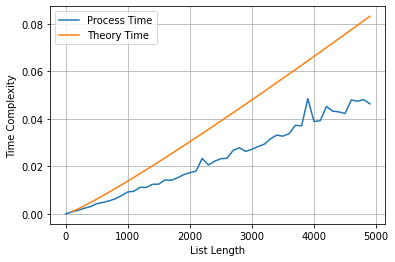

In [108]:
def find_MaximumCrossingSubarray(A, low, mid, high):
  LSum = np.NINF
  s = 0
  maxL = 0
  for i in range(mid, low - 1, -1):
    s = s + A[i]
    if s > LSum:
      LSum = s
      maxL = i

  RSum = np.NINF
  s = 0
  maxR = 0
  for j in range(mid+1, high):
    s = s + A[j]
    if s > RSum:
      RSum = s
      maxR = j
  return (maxL, maxR, LSum + RSum)

def find_MaximumSubarray(A, low, high):
  if high - 1 == low:
    return (low, high, A[low])
  else:
    mid = (low + high) // 2
    LLow, LHigh, LSum = find_MaximumSubarray(A, low, mid)
    RLow, RHigh, RSum = find_MaximumSubarray(A, mid, high)
    CLow, CHigh, CSum = find_MaximumCrossingSubarray(A, low, mid, high)

    if LSum > RSum and LSum > CSum:
      return (LLow, LHigh, LSum)
    elif RSum > LSum and RSum > CSum:
      return (RLow, RHigh, RSum)
    else:
      return (CLow, CHigh, CSum)



plt.xlabel('List Length')
plt.ylabel('Time Complexity')

times = list()
start_all = time.process_time()
for i in range(0, 50):
  start = time.clock()
  if i > 0:
    a = np.random.randint(-500, 500, size = i * 100)
    find_MaximumSubarray(a, 0, a.shape[0])
  end = time.process_time()
  times.append(end - start)

n = np.array([i * 100 for i in range(0, 50)])
plt.plot(n, times, label = "Process Time")
plt.plot(n, (1/500000) * n * np.log(n), label = "Theory Time")
plt.grid()
plt.legend()
plt.show()


In [109]:
arr_test = np.random.randint(-20, 20, size = 10)

print(arr_test,'\n',find_MaximumSubarray(arr_test, 0, arr_test.shape[0]))

[-15  19  12  -2  18   5 -15 -10   9  17] 
 (1, 9, 53)
